## Observations and Insights

## Dependencies and starter code

In [186]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


# Combine the data into a single dataset
result = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')
result 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_vol_stats = result.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe()
# tumor_vol_stats
tumor_vol_sem = result.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# tumor_vol_sem
tumor_vol_var = result.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
# tumor_vol_var
tumor_vol_med = result.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
# tumor_vol_med
tumor_vol_stats['sem'] = tumor_vol_sem
tumor_vol_stats['var'] = tumor_vol_var
tumor_vol_stats['med'] = tumor_vol_med
tumor_vol_stats


,count,mean,std,min,25%,50%,75%,max,sem,var,med
Drug Regimen,,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346,24.947764,41.557809
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821,39.290177,51.776157
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236,43.128684,51.820584
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860,68.553577,53.698743
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466,66.173479,52.509285
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331,61.168083,52.288934
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421,0.512884,42.351070,50.854632
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955,23.486704,40.673236
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111,59.450562,52.431737


## Bar plots

Text(0.5, 1.0, 'Number of counts per regiments')

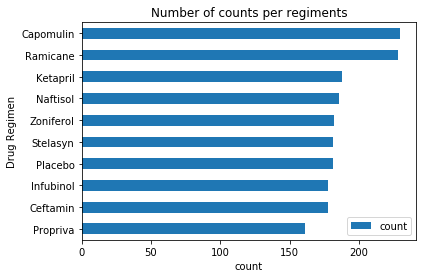

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_vol_stats.sort_values('count').plot(kind = 'barh',y = 'count')
plt.xlabel('count')
plt.title('Number of counts per regiments')



Text(0, 0.5, 'Drug Regiments')

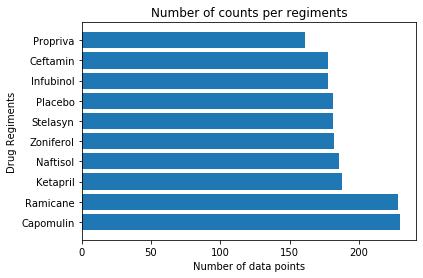

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen = result['Drug Regimen'].value_counts()
drug_name = result['Drug Regimen'].value_counts().index.tolist()
plt.barh(drug_name, drug_regimen)
plt.title('Number of counts per regiments')
plt.xlabel('Number of data points')
plt.ylabel('Drug Regiments')

## Pie plots

Text(0.5, 1.0, 'Male vs Female cases(in %)')

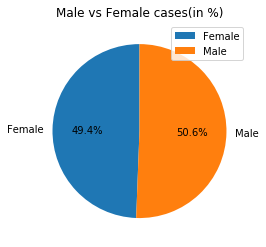

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
tumor_sex = result.groupby(['Sex']).count()
# tumor_sex
tumor_sex.plot(kind = 'pie',y = 'Mouse ID', x = 'Sex',autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Male vs Female cases(in %)')

Text(0.5, 1.0, 'Male vs Female cases(in %)')

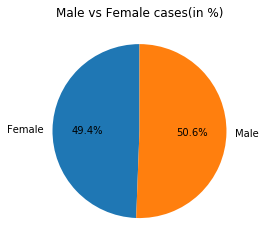

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = tumor_sex['Mouse ID'].tolist()
genders = ['Female', 'Male']
plt.pie(sex_count, labels = genders, autopct="%1.1f%%", startangle=90, )
plt.title('Male vs Female cases(in %)')

## Quartiles, outliers and boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# By 'Caclculate the final tumor volume, I am assuming I just set the timepoint to the final time to see the final size'
final_tumor = result.loc[result['Timepoint'] == 45]
final_tumor.sort_values(['Drug Regimen','Mouse ID'])
final_tumor_capomulin = result.loc[(result['Drug Regimen'] == 'Capomulin') & (result['Timepoint'] == 45)]
final_tumor_ramicane = result.loc[(result['Drug Regimen'] == 'Ramicane') & (result['Timepoint'] == 45)]
final_tumor_infubinol = result.loc[(result['Drug Regimen'] == 'Infubinol') & (result['Timepoint'] == 45)]
final_tumor_ceftamin = result.loc[(result['Drug Regimen'] == 'Ceftamin') & (result['Timepoint'] == 45)]

# Different way of finding the quartiles, Used describe earlier

capomulin_quartiles = final_tumor_capomulin.quantile([.25,.75])
capomulin_lowerq = quartiles['Tumor Volume (mm3)'][.25]
capomulin_upperq = quartiles['Tumor Volume (mm3)'][.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq 
capomulin_median = result.loc[result['Drug Regimen'] == 'Capomulin'].median()
capomulin_lowerb = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upperb = capomulin_upperq + (1.5*capomulin_iqr)

ramicane_quartiles = final_tumor_ramicane.quantile([.25,.75])
ramicane_lowerq = quartiles['Tumor Volume (mm3)'][.25]
ramicane_upperq = quartiles['Tumor Volume (mm3)'][.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq 
ramicane_median = result.loc[result['Drug Regimen'] == 'Ramicane'].median()
ramicane_lowerb = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upperb = ramicane_upperq + (1.5*ramicane_iqr)

infubinol_quartiles = final_tumor_infubinol.quantile([.25,.75])
infubinol_lowerq = quartiles['Tumor Volume (mm3)'][.25]
infubinol_upperq = quartiles['Tumor Volume (mm3)'][.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq 
infubinol_median = result.loc[result['Drug Regimen'] == 'Infubinol'].median()
infubinol_lowerb = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upperb = infubinol_upperq + (1.5*infubinol_iqr)

ceftamin_quartiles = final_tumor_ceftamin.quantile([.25,.75])
ceftamin_lowerq = quartiles['Tumor Volume (mm3)'][.25]
ceftamin_upperq = quartiles['Tumor Volume (mm3)'][.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq 
ceftamin_median = result.loc[result['Drug Regimen'] == 'Ceftamin'].median()
ceftamin_lowerb = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upperb = ceftamin_upperq + (1.5*ceftamin_iqr)






Text(0.5, 1.0, 'Final Tumor Volume (mm3) for each Regimen')

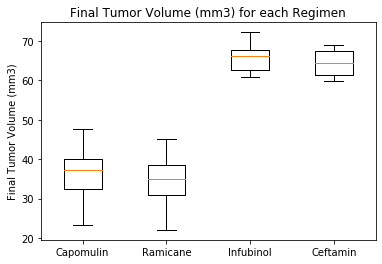

In [110]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# fig1, capomulin = plt.subplots()
# capomulin.boxplot(final_tumor_capomulin['Tumor Volume (mm3)'])
# capomulin.set_title('Final Tumor Volume (mm3) in Capomulin Regimen')
# capomulin.set_ylabel('Final Tumor Volume (mm3)')

# fig2, ramicane = plt.subplots()
# ramicane.boxplot(final_tumor_ramicane['Tumor Volume (mm3)'])
# ramicane.set_title('Final Tumor Volume (mm3) in Ramicane Regimen')
# ramicane.set_ylabel('Final Tumor Volume (mm3)')

# fig3, infubinol = plt.subplots()
# infubinol.boxplot(final_tumor_infubinol['Tumor Volume (mm3)'])
# infubinol.set_title('Final Tumor Volume (mm3) in Infubinol Regimen')
# infubinol.set_ylabel('Final Tumor Volume (mm3)')

# fig4, ceftamin = plt.subplots()
# ceftamin.boxplot(final_tumor_ceftamin['Tumor Volume (mm3)'])
# ceftamin.set_title('Final Tumor Volume (mm3) in Ceftamin Regimen')
# ceftamin.set_ylabel('Final Tumor Volume (mm3)')

data = [final_tumor_capomulin['Tumor Volume (mm3)'], final_tumor_ramicane['Tumor Volume (mm3)'],
       final_tumor_infubinol['Tumor Volume (mm3)'],final_tumor_ceftamin['Tumor Volume (mm3)']]
fig5, regimens = plt.subplots()
regimens.boxplot(data)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
regimens.set_ylabel('Final Tumor Volume (mm3)')
regimens.set_title('Final Tumor Volume (mm3) for each Regimen')

## Line and scatter plots

Text(0.5, 1.0, 'Mouse k403 using Ramicane')

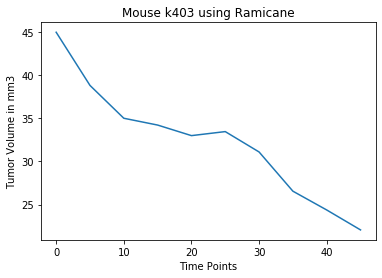

In [124]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
k403 = result.loc[result["Mouse ID"] == "k403"]
k403_timepoint = k403['Timepoint']
k403_tv = k403['Tumor Volume (mm3)']
plt.plot(k403_timepoint, k403_tv)
plt.xlabel('Time Points')
plt.ylabel('Tumor Volume in mm3')
plt.title('Mouse k403 using Ramicane')

Text(0.5, 1.0, 'Average Tumor Volume vs Weight in (g)')

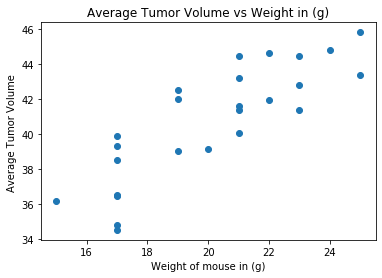

In [157]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = result.loc[result['Drug Regimen'] == 'Capomulin']
capomulin_scatter = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]] 
mouse_weights = capomulin_scatter.groupby(['Mouse ID'])['Weight (g)'].unique()
mouse_group = capomulin_scatter.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()
plt.scatter(mouse_weights,mouse_group)
plt.xlabel("Weight of mouse in (g)")
plt.ylabel('Average Tumor Volume ')
plt.title('Average Tumor Volume vs Weight in (g)')


The correlation coefficient between mouse weight and average tumor size  is 0.84


Text(0, 0.5, 'Average Tumor Volume')

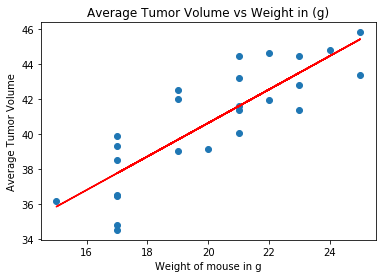

In [194]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation_table = capomulin_scatter.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
mouse_g = correlation_table['Weight (g)']
mouse_atv = correlation_table['Tumor Volume (mm3)']
print(f"The correlation coefficient between mouse weight and average tumor size  is {round(st.pearsonr(mouse_g,mouse_atv)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_g, mouse_atv)
regress_values = mouse_g * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_g, mouse_atv)
plt.plot(mouse_g,regress_values,"r-")
plt.title('Average Tumor Volume vs Weight in (g)')
plt.xlabel('Weight of mouse in g')
plt.ylabel('Average Tumor Volume')



